In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('springData.txt', sep=' ')
data

,Distance(m),Mass(kg)
0,0.0865,0.10
1,0.1015,0.15
2,0.1106,0.20
3,0.1279,0.25
4,0.1892,0.30
5,0.2695,0.35
6,0.2888,0.40
7,0.2425,0.45
8,0.3465,0.50
9,0.3225,0.55


In [3]:
data['Force(N)'] = data['Mass(kg)'] * 9.81

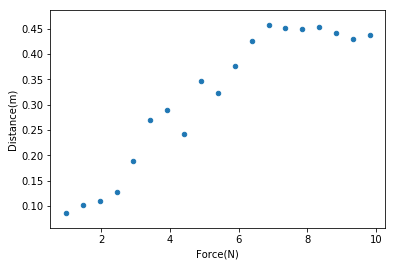

In [4]:
data.plot('Force(N)', 'Distance(m)', kind='scatter')

In [5]:
data = data[data['Force(N)'] < 7]

In [14]:
data

,Distance(m),Mass(kg),Force(N)
0,0.0865,0.10,0.9810
1,0.1015,0.15,1.4715
2,0.1106,0.20,1.9620
3,0.1279,0.25,2.4525
4,0.1892,0.30,2.9430
5,0.2695,0.35,3.4335
6,0.2888,0.40,3.9240
7,0.2425,0.45,4.4145
8,0.3465,0.50,4.9050
9,0.3225,0.55,5.3955


In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
reg = LinearRegression(fit_intercept=False)
reg.fit(data['Force(N)'].values.reshape(-1,1), data['Distance(m)'])

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [8]:
reg.coef_

array([0.06540844])

In [9]:
f = lambda x: x * reg.coef_

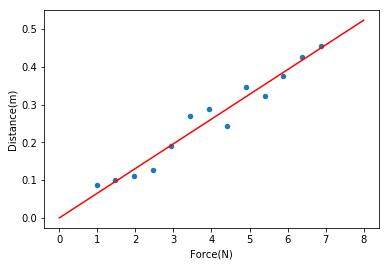

In [10]:
ax = data.plot('Force(N)', 'Distance(m)', kind='scatter')
_x = np.linspace(0, 8, num=50)
_y = f(_x)
ax.plot(_x, _y, c='r')

In [12]:
def residual(k, data):
    x = data['Force(N)']
    y = data['Distance(m)']
    return np.sum((y - k*x) **2)

In [13]:
k_list = np.linspace(0.05, 0.08, 50) 
y = [residual(k, data) for k in k_list]

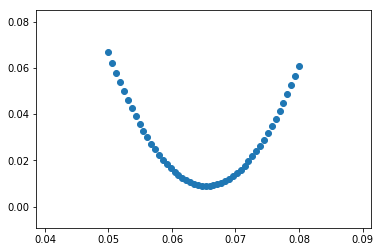

In [14]:
plt.scatter(k_list, y)

In [15]:
from scipy.optimize import minimize

In [16]:
from functools import partial

In [17]:
my_residual = partial(residual, data=data)

In [18]:
minimize(my_residual, 0)

      fun: 0.008890481420126656
 hess_inv: array([[1]])
      jac: array([7.87898898e-07])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([0.06540844])

In [19]:
def diff_residual(k, data):
    x = data['Force(N)']
    y = data['Distance(m)']
    return 2 * np.sum(x * (x*k - y))

In [20]:
a = 0.0001
e = 1e-5
k = 0.0
while np.abs(diff_residual(k, data)) > e:
    k -= a * diff_residual(k, data)
print(k)

0.06540842097379776


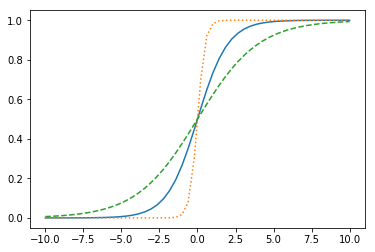

In [21]:
def sigmoid_f(x, a=1):
    return 1.0 / (1.0 + np.exp(-a*x))

x = np.linspace(-10,10)
plt.plot(x, sigmoid_f(x))
plt.plot(x, sigmoid_f(x, 4), linestyle=':')
plt.plot(x, sigmoid_f(x, 0.5), linestyle='--')

In [22]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [23]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target 
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [24]:
iris_sv = iris_df[iris_df['target'].isin([0, 1])]

Text(0, 0.5, 'petal length (cm)')

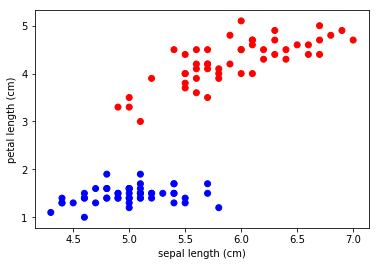

In [25]:
x0 = 'sepal length (cm)'
x1 = 'petal length (cm)'
fig, ax = plt.subplots()
ax.scatter(iris_sv[x0], iris_sv[x1], c = ['r' if c else 'b' for c in iris_sv['target']])
ax.set_xlabel(x0)
ax.set_ylabel(x1)

In [26]:
X = iris_sv[[x0, x1]]
y = iris_sv['target']

In [27]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X,y)

/Users/tsuji/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
reg.coef_

array([[-1.4082779,  2.9856694]])

In [29]:
reg.intercept_

array([-0.54867646])

In [30]:
def sk_fit_logistic(x0, x1,reg):
    x = np.array([x0, x1])
    w = np.dot(x , reg.coef_[0]) + reg.intercept_
    return 1.0 / (1.0 + np.exp(-w))[0]

In [31]:
x0_range = np.linspace(4,7.2)
x1_range = np.linspace(0.8,5.2)
x0m, x1m = np.meshgrid(x0_range, x1_range)

In [32]:
vfunc = np.vectorize(sk_fit_logistic)

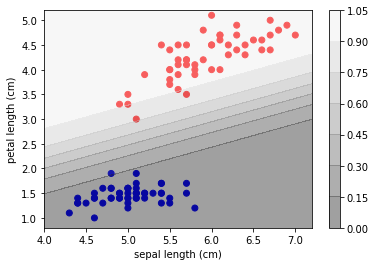

In [33]:
fig, ax = plt.subplots()
ax.scatter(iris_sv[x0], iris_sv[x1], c = ['r' if c else 'b' for c in iris_sv['target']])
img = ax.contourf(x0m, x1m, vfunc(x0m, x1m, reg), alpha=0.4, cmap=plt.cm.gray)
ax.set_xlabel(x0)
ax.set_ylabel(x1)
fig.colorbar(img)

In [34]:
def sigmoid_2d(x0, x1, p):
    f = lambda w: 1.0 / (1.0 + np.exp(w))
    x = np.array([x0, x1])
    w = np.dot(x, [p[0], p[1]]) + p[2]
    return f(w)

def likelihood(param, X, y):
    res = 0
    for i in range(X.shape[0]):
        s = sigmoid_2d(*X.iloc[i], param)
        res -= y[i] * np.log(s) + (1-y[i])*np.log(1-s)
    return res

my_likelihood = partial(likelihood, X=X, y=y)

In [35]:
from scipy.optimize import minimize
res = minimize(my_likelihood, x0=(0, 0, 0), method='Nelder-Mead')

/Users/tsuji/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/tsuji/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


In [36]:
res.x

array([  7.7191245 , -17.03775056,   3.84098033])

In [37]:
vfunc = np.vectorize(partial(sigmoid_2d, p=res.x))

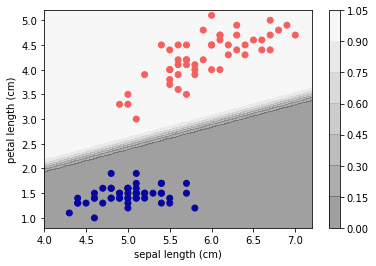

In [38]:
fig, ax = plt.subplots()
ax.scatter(iris_sv[x0], iris_sv[x1], c = ['r' if c else 'b' for c in iris_sv['target']])
img = ax.contourf(x0m, x1m, vfunc(x0m, x1m), alpha=0.4, cmap=plt.cm.gray)
ax.set_xlabel(x0)
ax.set_ylabel(x1)
fig.colorbar(img)

In [39]:
from sympy import *
init_printing()
var('a x')
f = 1 / (1+exp(- a*x))

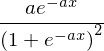

In [40]:
diff(f, x)